# Exemple d'algoritme genètic

El següent codi crea un algoritme genètic per minimitzar una determinada funció quadràtica.  

S'ha assolit el nombre màxim de generacions
Nombre de generacions: 1000

5 millors resultats:
(Fitness, Valor d'x)
(0.1583000000000001, 3.8417)
(0.25260000000000016, 3.7474)
(0.4828999999999999, 4.4829)
(0.5987, 4.5987)
(0.7832999999999997, 4.7833)


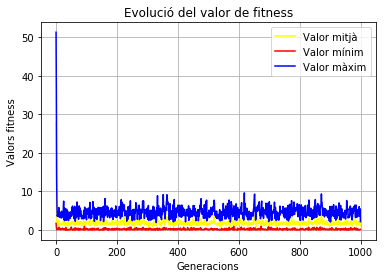

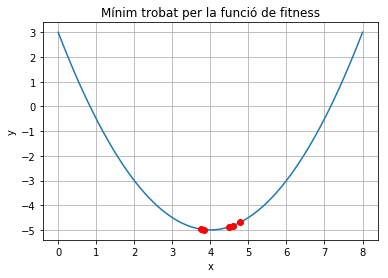

In [1]:
%matplotlib inline

import random
import string
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Adaptat de: https://www.youtube.com/watch?v=4XZoVQOt-0I

def funcio_minim(x):
    """Funcio quadratica sobre la que s'aplicara l'algorisme genetic"""
    return ((1/2) * x**2 - 4*x + 3)


def derivada_funcio_minim(x):
    """Derivada de la funcio funcio_minim() que s'utilitzara per calcular el fitness"""
    return x - 4


def fitness(x):
    """Caclula el fitness dels individus de la poblacio"""
    puntuacio_fitness = abs(derivada_funcio_minim(x))
    
    # El fitness será el propi valor de la funcio en valor absolut: com mes proper a zero, millor resultat
    return(puntuacio_fitness)


def poblacio_inicial():
    """Defineix la poblacio inicial"""
    poblacio = []
    for individu in range(15):
        poblacio.append( (round(random.uniform(-50, 50), 1) ))
    
    return(poblacio)


def simulacio_minim():
    
    """Mitjancant un algoritme genetic, troba el minim de la funcio de segon grau
    definida en la funcio funcio_minim(x) gracies a l'us de la seva derivada, definida
    en la funcio derivada_funcio_minim(x). Si el valor de la derivada per a un valor d'x
    generat per la simulacio es 0, aleshores vol dir que aquell valor d'x respresenta un
    minim. El rang de valors entre els quals es crea la poblacio inicial inclou aquell valor
    d'x on es troba el minim.
    """
    
    # Crea la poblacio inicial
    poblacio = poblacio_inicial()
    min_fitness_funcio = []
    max_fitness_funcio = []
    mitjana_fitness_funcio = []
    numero_generacio = 0
    MAXIM_GENERACIONS = 1000

    # Iniciem les simulacions
    for i in range(MAXIM_GENERACIONS):
        
        # Declarem dues variables buides per guardar els resultats de cada simulacio
        valors_fitness = []
        ranking_individus = []
        for individu in poblacio:
            # Creem una llista on hi haura tuples amb el fitness i l'individu
            ranking_individus.append( (fitness(individu), individu) )
        # Ordenem la llista de forma decreixent segons el fitness de cada individu
        ranking_individus.sort()
        
        # Si es troba el valor buscat, s'acaba el bucle
        if ranking_individus[0][0] == 0:
            break
        
        # Extraiem els valors de fitness i els guardem a la llista
        for num_individu in range(len(ranking_individus)):
            valors_fitness.append(ranking_individus[num_individu][0])
        
        # Guardem els valors minim, maxim i mitjà dels valors de fitness de la generacio
        min_fitness_funcio.append(min(valors_fitness))
        max_fitness_funcio.append(max(valors_fitness))
        mitjana_fitness_funcio.append(np.mean(np.asfarray(valors_fitness)))

        # Encreuament i creacio de la nova generacio
        # Seleccionem les 8 millors solucions, que seran les que es combinaran per generar la nova generacio
        millors_solucions = ranking_individus[:8]

        # Creem la nova generacio: s'escullen dos progenitors a l'atzar i es combinen fent 
        # la seva mitjana aritmetica
        # Mutarem cada individu nou multiplicant el resultat de la combinacio dels 
        # progenitors per un nombre aleatori entre 0.5 i 2
        # Ref.: https://stackoverflow.com/questions/41047229/genetic-algorithm-to-solve-a-quadratic-equation
        nova_generacio = []
        mutacio = [0.5, 2]
        for _ in range(15):
            
            # S'escullen els progenitors a l'atzar
            primer_progenitor = random.choice(millors_solucions)
            segon_progenitor = random.choice(millors_solucions)
            
            # Es mescla i es muta el gen
            nova_generacio.append(round(((primer_progenitor[1]+segon_progenitor[1])/2)*random.uniform(0.5, 2), 4))

        # Assignem la nova generacio a la poblacio
        poblacio = nova_generacio
        numero_generacio += 1
    
    # Mostrem els resultats
    if numero_generacio == MAXIM_GENERACIONS:
        print("S'ha assolit el nombre màxim de generacions")
    print(f"Nombre de generacions: {numero_generacio}")
    print("")
    print("5 millors resultats:")
    print("(Fitness, Valor d'x)")
    for i in ranking_individus[:5]:
        print(i)
        
    # Fem els grafics
    plt.plot(mitjana_fitness_funcio, label = 'Valor mitjà', color = 'yellow')
    plt.plot(min_fitness_funcio, label = 'Valor mínim', color = 'red')
    plt.plot(max_fitness_funcio, label = 'Valor màxim', color = 'blue')


    # Definim els titols dels eixos i del grafic
    plt.title("Evolució del valor de fitness")
    plt.ylabel("Valors fitness")
    plt.xlabel("Generacions")

    # Afegim la llegenda i la quadricula
    plt.legend(loc = 1)
    plt.grid()
    plt.show()
    
    # Fem el grafic de la funcio original i comprovem el valor trobat
    x = np.linspace(0, 8, 100)
    y = funcio_minim(x)
    plt.plot(x, y)
    x1 = ranking_individus[0][1]
    x2 = ranking_individus[1][1]
    x3 = ranking_individus[2][1]
    x4 = ranking_individus[3][1]
    x5 = ranking_individus[4][1]
    y1 = funcio_minim(x1)
    y2 = funcio_minim(x2)
    y3 = funcio_minim(x3)
    y4 = funcio_minim(x4)
    y5 = funcio_minim(x5)
    plt.plot(x1, y1, 'ro')
    plt.plot(x2, y2, 'ro')
    plt.plot(x3, y3, 'ro')
    plt.plot(x4, y4, 'ro')
    plt.plot(x5, y5, 'ro')
    
    # Definim els titols dels eixos i del grafic 
    plt.title("Mínim trobat per la funció de fitness")
    plt.ylabel("y")
    plt.xlabel("x")
    
    # Afegim la quadricula
    plt.grid()
    plt.show()

    
simulacio_minim()